# Predictions of Powerlifting Totals Using Machine Learning 

## INFO 1998 Spring '25 Final Project

## Rishik Gowrishetti

__Introduction__

Powerlifting is a sport which involves attempting to attain the best total in the squat, bench, and deadlift in a meet.

The following project will attempt to predict an athlete's total (sum of best squat, bench, and deadlift) based on their body weight, gender, and past performance. Can we predict an athlete's performance?

Through data visualization, trend prediction, and model application, we hope to gain insights into the key determinants of success in powerlifting. This will involve building and optimizing predictive models to estimate an athlete’s total based on their characteristics and training history.

Sources

The following CSV dataset was obtained under CC0: Public Domain, as hosted by Kaggle.com and its publishers.

The dataset can be found here: https://www.kaggle.com/datasets/open-powerlifting/powerlifting-database

This dataset is sourced from the OpenPowerlifting project, which compiles powerlifting competition results from various federations worldwide. More information and data access can be found at:
OpenPowerlifting Website: https://www.openpowerlifting.org/

Citation: OpenPowerlifting. (Ongoing). "OpenPowerlifting Dataset." Retrieved from https://www.openpowerlifting.org.

In [24]:
# Import necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [25]:
data = pd.read_csv('openpowerlifting-2024-01-06-4c732975.csv')

/var/folders/9l/p3zt21w940q87chnz66klhcm0000gn/T/ipykernel_29505/3516322320.py:1: DtypeWarning: Columns (31,33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('openpowerlifting-2024-01-06-4c732975.csv')


#### completely unrelated but cool how I am also in this public dataset

In [26]:
me = data[data['Name'] == 'Rishik Gowrishetti']
me

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
391534,Rishik Gowrishetti,M,SBD,Raw,15.5,16-17,14-18,MR-T,55.2,56,...,Yes,USA,CT,USAPL,NaN,2022-11-05,USA,CT,NaN,CT Liftsgiving Open
519925,Rishik Gowrishetti,M,SBD,Raw,16.5,16-17,14-18,MR-G,56.0,56,...,Yes,USA,CT,USAPL,NaN,2023-11-18,USA,MA,NaN,Massachusetts State Championships


In [27]:
print(data.head())  
print(data.info())  
print(data.describe())

                     Name Sex Event Equipment   Age AgeClass BirthYearClass  \
0             Alona Vladi   F   SBD       Raw  33.0    24-34          24-39   
1      Galina Solovyanova   F   SBD       Raw  43.0    40-44          40-49   
2          Daniil Voronin   M   SBD       Raw  15.5    16-17          14-18   
3          Aleksey Krasov   M   SBD       Raw  35.0    35-39          24-39   
4  Margarita Pleschenkova   M   SBD       Raw  26.5    24-34          24-39   

  Division  BodyweightKg WeightClassKg  ...  Tested  Country  State  \
0        O         58.30            60  ...     Yes   Russia    NaN   
1       M1         73.10            75  ...     Yes   Russia    NaN   
2        T         67.40            75  ...     Yes   Russia    NaN   
3        O         66.65            75  ...     Yes   Russia    NaN   
4        O         72.45            75  ...     Yes   Russia    NaN   

   Federation  ParentFederation        Date  MeetCountry  MeetState  MeetTown  \
0         GFP    

#### Relationship Between Body Weight and Total Lift (Scatter Plot)

/opt/anaconda3/envs/datajournal/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


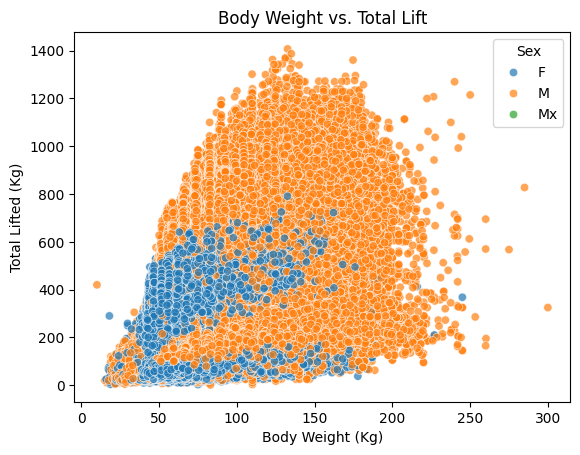

In [28]:
sns.scatterplot(data=data, x='BodyweightKg', y='TotalKg', hue='Sex', alpha=0.7)
plt.title('Body Weight vs. Total Lift')
plt.xlabel('Body Weight (Kg)')
plt.ylabel('Total Lifted (Kg)')
plt.legend(title="Sex")
plt.show()

### What the heck????

Usually, the expected would be that the higher the body weight the higher the total lift; although that can kind of be seen here its difficult to see. Why is that? 

This is because the disparities between beginner and elite powerlifters are incredibly wide. This data set includes both, and after a certain point of weight there are diminishing returns. Let's see if we can filter the data.

In [29]:

elite_data = data[data['Federation'].isin(['IPF', 'USAPL', 'USPA'])]

threshold = data['TotalKg'].quantile(0.75)  # Get the top 25% lifters
elite_data = data[data['TotalKg'] >= threshold]


That's better!

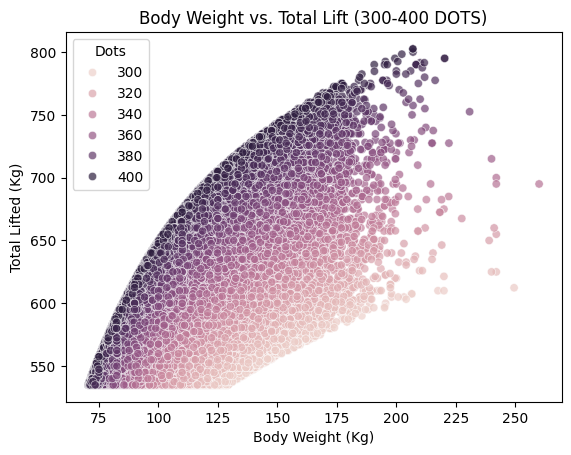

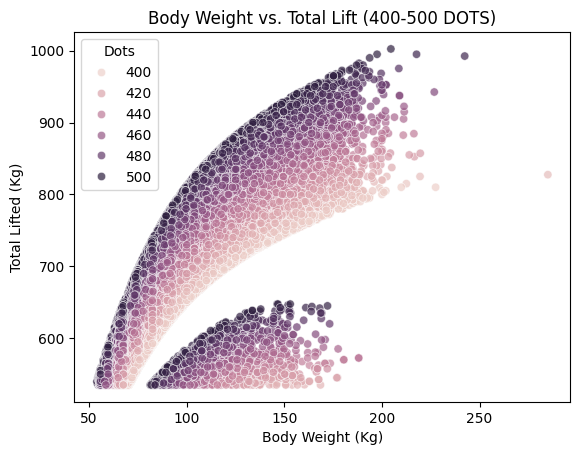

In [30]:
# Let's try seeing how the graph looks for each DOTS calculation lets do 300-400 and 400-500

weak = elite_data[(elite_data['Dots'] >= 300) & (elite_data['Dots'] <= 400)]

sns.scatterplot(data=weak, x='BodyweightKg', y='TotalKg', hue='Dots', alpha=0.7)
plt.title('Body Weight vs. Total Lift (300-400 DOTS)')
plt.xlabel('Body Weight (Kg)')
plt.ylabel('Total Lifted (Kg)')
plt.show()

weakish = elite_data[(elite_data['Dots'] >= 400) & (elite_data['Dots'] <= 500)]

sns.scatterplot(data=weakish, x='BodyweightKg', y='TotalKg', hue='Dots', alpha=0.7)
plt.title('Body Weight vs. Total Lift (400-500 DOTS)')
plt.xlabel('Body Weight (Kg)')
plt.ylabel('Total Lifted (Kg)')
plt.show()

The reason for the two curves is because of the difference of male and female dots calculations!

### This visualization is just to show how all lifters are distributed strength wise.

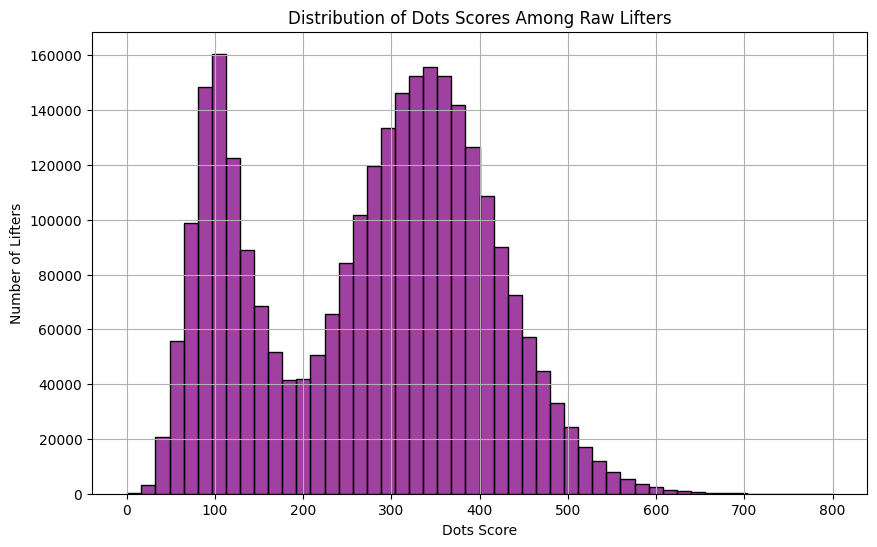

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(data['Dots'], bins=50, color='purple')
plt.title('Distribution of Dots Scores Among Raw Lifters')
plt.xlabel('Dots Score')
plt.ylabel('Number of Lifters')
plt.grid(True)
plt.show()

### So we can see there is an obvious correlation between bodyweight and total weight lifted; however our question is to PREDICT the next weight of a person. First we did the correlation to showcase that between different strength levels (DOTS) the comparion is different. So if I were to just do a train test for all of the data such would happen.

In [32]:
filtered_data = data[(data['Equipment'] == 'Raw') & (data['Dots'] >= 0)] #DOTS 0 to make sure any lifter is allowed

In [33]:
# Find time between two meets
filtered_data['Date'] = pd.to_datetime(filtered_data['Date'])
filtered_data = filtered_data.sort_values(['Name', 'Date']) 

/var/folders/9l/p3zt21w940q87chnz66klhcm0000gn/T/ipykernel_29505/2568929956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Date'] = pd.to_datetime(filtered_data['Date'])


In [34]:
# Filter data to group dates next to each other
# make new columns for time between and the total kg between
filtered_data['NextTotalKg'] = filtered_data.groupby('Name')['TotalKg'].shift(-1)
filtered_data['NextDate'] = filtered_data.groupby('Name')['Date'].shift(-1)
filtered_data['MonthsBetween'] = (filtered_data['NextDate'] - filtered_data['Date']).dt.days / 30

train_data = filtered_data.dropna(subset=['NextTotalKg'])

train_data.head()

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName,NextTotalKg,NextDate,MonthsBetween
2418668,A Wells,M,B,Raw,NaN,NaN,NaN,Under 15,60.0,60,...,PA,IPF,2002-01-01,Australia,NaN,NaN,Australian Schools Postal Bench Press,60.0,2003-01-01,12.166667
2086947,A Yang,M,SBD,Raw,24.0,24-34,24-39,Open,66.1,67.5,...,USPA,IPL,2017-01-07,USA,NC,Raleigh,2nd Annual Raleigh Ruckus,555.0,2017-10-07,9.100000
334082,A'Dren Hye,M,SBD,Raw,21.5,20-23,19-23,MR-Jr,92.0,93,...,USAPL,IPF,2015-03-21,USA,NC,NaN,Battle on the Border IX,707.5,2016-06-04,14.700000
544223,A'Dren Hye,M,SBD,Raw,22.5,20-23,19-23,MR-O,91.1,93,...,USAPL,IPF,2016-06-04,USA,NC,NaN,North Carolina State Championships,195.0,2017-04-08,10.266667
385990,A'Dren Hye,M,B,Raw,23.5,24-34,24-39,MR-O,104.1,105,...,USAPL,IPF,2017-04-08,USA,SC,NaN,Battle on the Border,757.5,2017-04-08,0.000000


In [35]:

features = train_data[['TotalKg', 'BodyweightKg', 'Sex', 'MonthsBetween']]

features = pd.get_dummies(features, columns=['Sex'], drop_first=True)
labels = train_data['NextTotalKg']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [36]:
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

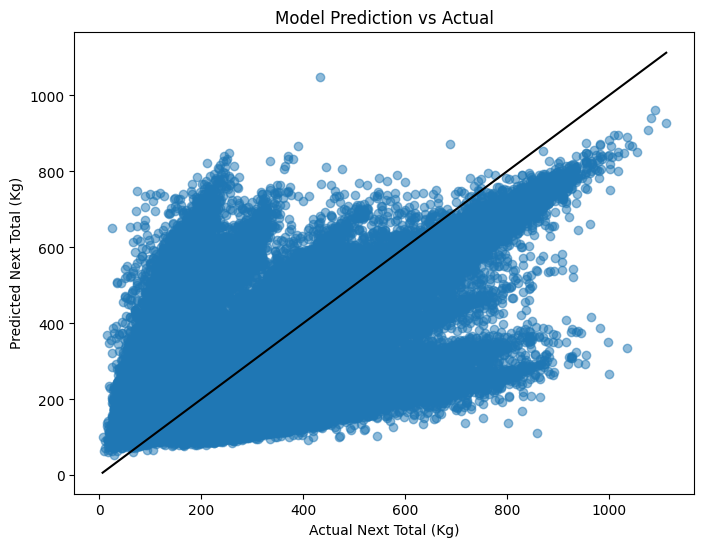

In [37]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, predictions, alpha=0.5)

# linear regression plot line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'black')

plt.xlabel('Actual Next Total (Kg)')
plt.ylabel('Predicted Next Total (Kg)')
plt.title('Model Prediction vs Actual')
plt.show()

The model prediction is terrible because of the strength deviation between levels. Now let's say we did a predictor for each DOTS level instead. 

/var/folders/9l/p3zt21w940q87chnz66klhcm0000gn/T/ipykernel_29505/1540824929.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Date'] = pd.to_datetime(filtered_data['Date'])


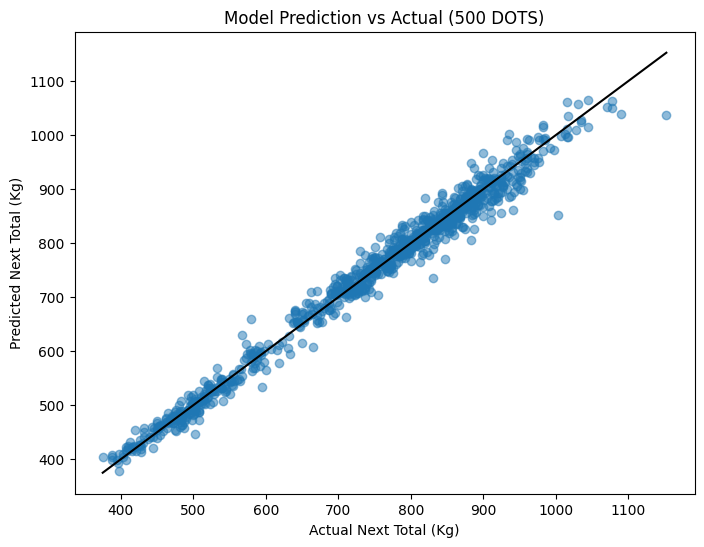

In [38]:
#After 500 DOTS usually someone is considered to be an ELITE powerlifter; so lets try 500!
filtered_data = data[(data['Equipment'] == 'Raw') & (data['Dots'] >= 500)]

filtered_data['Date'] = pd.to_datetime(filtered_data['Date'])
filtered_data = filtered_data.sort_values(['Name', 'Date']) 

filtered_data['NextTotalKg'] = filtered_data.groupby('Name')['TotalKg'].shift(-1)
filtered_data['NextDate'] = filtered_data.groupby('Name')['Date'].shift(-1)
filtered_data['MonthsBetween'] = (filtered_data['NextDate'] - filtered_data['Date']).dt.days / 30

train_data = filtered_data.dropna(subset=['NextTotalKg'])

train_data.head()

features = train_data[['TotalKg', 'BodyweightKg', 'Sex', 'MonthsBetween']]

features = pd.get_dummies(features, columns=['Sex'], drop_first=True)
labels = train_data['NextTotalKg']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

plt.figure(figsize=(8,6))
plt.scatter(y_test, predictions, alpha=0.5)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'black')

plt.xlabel('Actual Next Total (Kg)')
plt.ylabel('Predicted Next Total (Kg)')
plt.title('Model Prediction vs Actual (500 DOTS)')
plt.show()

That's pretty good! We can see the graph looks pretty accurate, showing we can predict the strengths of elite powerlifters for future competitions.

Another interesting thing we can do is predict if a lifter performs better or worse in their next meet! This is a classification problem! Accuracy is unfortunately low! 

In [39]:
train_data['BetterPerformance'] = (train_data['NextTotalKg'] > train_data['TotalKg']).astype(int)

features = train_data[['TotalKg', 'BodyweightKg', 'Sex', 'MonthsBetween']]

features = pd.get_dummies(features, columns=['Sex'], drop_first=True)

labels = train_data['BetterPerformance']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.6096311475409836


/var/folders/9l/p3zt21w940q87chnz66klhcm0000gn/T/ipykernel_29505/3518986471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['BetterPerformance'] = (train_data['NextTotalKg'] > train_data['TotalKg']).astype(int)


## Conclusion

In this project, I used the OpenPowerlifting dataset to predict the performance of powerlifters, specifically their total lift in future competitions. I first visualized the relationship between body weight and total lifted using scatter plots and histograms. I filtered the dataset for elite lifters (those with DOTS scores above 500) to focus on more consistent data.

To predict the next total lift for each lifter, I applied linear regression using features such as body weight, gender, and the time between competitions. However, the predictions were skewed due to the wide variance in strength levels, especially across beginners and elites. I then shifted to a classification approach where I predicted whether a lifter would perform better or worse in their next competition, using logistic regression. The classification model was based on features like total lift, body weight, gender, and time between meets. Despite the lower accuracy, this approach allowed me to explore performance trends and how different models handle predictions in powerlifting.